In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import shutil
import glob
import cv2
import pydicom
from tqdm import tqdm_notebook

In [11]:
tf.__version__

'2.2.0-rc4'

In [2]:
!pip install pydicom

     |████████████████████████████████| 35.3MB 88kB/s 


In [0]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ajaxlegrand","key":"ec8b051088a46eadd2acfc2cdcbea65c"}'}

In [0]:
!mkdir ~/.kaggle/

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!ls ~/.kaggle/

kaggle.json


In [0]:
rm -r dataset/

In [0]:
mkdir dataset/ && mkdir dataset/covid && mkdir dataset/pneumonia && mkdir dataset/normal

In [0]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 1648 (delta 8), reused 25 (delta 6), pack-reused 1616
Receiving objects: 100% (1648/1648), 221.06 MiB | 30.94 MiB/s, done.
Resolving deltas: 100% (782/782), done.
Checking out files: 100% (356/356), done.


In [0]:
!git clone https://github.com/agchung/Figure1-COVID-chestxray-dataset.git

Cloning into 'Figure1-COVID-chestxray-dataset'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 94 (delta 26), reused 79 (delta 14), pack-reused 0
Unpacking objects: 100% (94/94), done.


In [0]:
!ls Figure1-COVID-chestxray-dataset/images

COVID-00001.jpg   COVID-00011.jpg   COVID-00020.jpg  COVID-00031.jpg
COVID-00002.jpg   COVID-00012.jpg   COVID-00021.jpg  COVID-00032.jpg
COVID-00003a.jpg  COVID-00013a.jpg  COVID-00022.jpg  COVID-00033.jpg
COVID-00003b.jpg  COVID-00013b.jpg  COVID-00023.jpg  COVID-00034.jpg
COVID-00004.jpg   COVID-00014.jpg   COVID-00024.jpg  COVID-00035.jpg
COVID-00005.jpg   COVID-00015a.png  COVID-00025.jpg  COVID-00036.jpg
COVID-00006.jpg   COVID-00015b.png  COVID-00026.jpg  COVID-00037.jpg
COVID-00007.jpg   COVID-00016.jpg   COVID-00027.jpg  COVID-00038.jpg
COVID-00008.jpg   COVID-00017.jpg   COVID-00028.jpg
COVID-00009.jpg   COVID-00018.jpg   COVID-00029.jpg
COVID-00010.jpg   COVID-00019.jpg   COVID-00030.jpg


In [0]:
!cp Figure1-COVID-chestxray-dataset/images/* dataset/covid/

In [0]:
metadata = pd.read_csv('covid-chestxray-dataset/metadata.csv')

In [0]:
metadata.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 27
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [0]:
covid_filenames = []

for data in metadata.iterrows():
  # print(data[1].sex)
  # break
  if data[1].finding == 'COVID-19':
    covid_filenames.append(data[1].filename)

In [0]:
len(covid_filenames)

284

In [0]:
len(os.listdir('dataset/covid'))

41

In [0]:
for filename in covid_filenames:
  if filename in os.listdir('covid-chestxray-dataset/images'):
    shutil.copy(os.path.join('covid-chestxray-dataset/images', filename), 'dataset/covid/')

In [0]:
len(os.listdir('dataset/covid'))

304

In [0]:
!kaggle competitions download -c rsna-pneumonia-detection-challenge

In [0]:
!mkdir kaggle_dataset/

In [0]:
!mv *.dcm kaggle_dataset/

In [0]:
len(os.listdir('kaggle_dataset'))

40

In [0]:
!kaggle competitions download -c siim-acr-pneumothorax-segmentation --force

  0% 0.00/130k [00:00<?, ?B/s]
100% 130k/130k [00:00<00:00, 39.7MB/s]
  0% 0.00/148k [00:00<?, ?B/s]
100% 148k/148k [00:00<00:00, 46.9MB/s]
  0% 0.00/159k [00:00<?, ?B/s]
100% 159k/159k [00:00<00:00, 138MB/s]
  0% 0.00/97.3k [00:00<?, ?B/s]
100% 97.3k/97.3k [00:00<00:00, 82.9MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 114MB/s]
  0% 0.00/110k [00:00<?, ?B/s]
100% 110k/110k [00:00<00:00, 97.4MB/s]
  0% 0.00/89.8k [00:00<?, ?B/s]
100% 89.8k/89.8k [00:00<00:00, 91.5MB/s]
  0% 0.00/130k [00:00<?, ?B/s]
100% 130k/130k [00:00<00:00, 39.0MB/s]
  0% 0.00/113k [00:00<?, ?B/s]
100% 113k/113k [00:00<00:00, 116MB/s]
  0% 0.00/153k [00:00<?, ?B/s]
100% 153k/153k [00:00<00:00, 137MB/s]
  0% 0.00/151k [00:00<?, ?B/s]
100% 151k/151k [00:00<00:00, 48.0MB/s]
  0% 0.00/114k [00:00<?, ?B/s]
100% 114k/114k [00:00<00:00, 34.3MB/s]
  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 127MB/s]
  0% 0.00/131k [00:00<?, ?B/s]
100% 131k/131k [00:00<00:00, 134MB/s]
  0% 0.00/153k [00:0

In [0]:
!rm -r *.py && rm -r *.csv && rm -r *.zip && rm -r *.dcm

rm: cannot remove '*.dcm': No such file or directory


In [0]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-05-02 20:35:01          62853  
divyansh22/us-border-crossing-data                          US Border Crossing Data                               2MB  2020-04-19 09:38:10           1305  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           7430  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                         3GB  2020-04-19 14:48:39            121  
doaaalsenani/usa-cers-dataset                               US C

In [0]:
!ls ~/.data/

ls: cannot access '/root/.data/': No such file or directory


In [0]:
!python download_images.py

In [0]:
!gcloud auth application-default login

In [0]:
!rm -r *.dcm

#**Pneumonia Segmentation after detecting COVID**

In [12]:
!kaggle datasets download -d abhishek/siim-dicom-images

100% 1.51G/1.52G [00:33<00:00, 27.3MB/s]
100% 1.52G/1.52G [00:33<00:00, 48.7MB/s]


In [13]:
!unzip siim-dicom-images.zip -d /pneumothorax

Streaming output truncated to the last 5000 lines.
  inflating: /pneumothorax/siim-original/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2137.1517875171.310659/1.2.276.0.7230010.3.1.3.8323329.2137.1517875171.310658/1.2.276.0.7230010.3.1.4.8323329.2137.1517875171.310660.dcm  
  inflating: /pneumothorax/siim-original/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2138.1517875171.323419/1.2.276.0.7230010.3.1.3.8323329.2138.1517875171.323418/1.2.276.0.7230010.3.1.4.8323329.2138.1517875171.323420.dcm  
  inflating: /pneumothorax/siim-original/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2139.1517875171.325963/1.2.276.0.7230010.3.1.3.8323329.2139.1517875171.325962/1.2.276.0.7230010.3.1.4.8323329.2139.1517875171.325964.dcm  
  inflating: /pneumothorax/siim-original/dicom-images-train/1.2.276.0.7230010.3.1.2.8323329.2140.1517875171.331423/1.2.276.0.7230010.3.1.3.8323329.2140.1517875171.331422/1.2.276.0.7230010.3.1.4.8323329.2140.1517875171.331424.dcm  
  inflating: /pneumothora

In [0]:
def show_dcm_info(dataset):
    print("Storage type.....:", dataset.SOPClassUID)
    print()

    pat_name = dataset.PatientName
    display_name = pat_name.family_name + ", " + pat_name.given_name
    print("Patient's name......:", display_name)
    print("Patient id..........:", dataset.PatientID)
    print("Patient's Age.......:", dataset.PatientAge)
    print("Patient's Sex.......:", dataset.PatientSex)
    print("Modality............:", dataset.Modality)
    print("Body Part Examined..:", dataset.BodyPartExamined)
    print("View Position.......:", dataset.ViewPosition)
    
    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)

def plot_pixel_array(dataset, figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.show()

In [0]:
!ls /pneumothorax/siim-original/dicom-images-train/

In [0]:
!ls /pneumothorax/siim-original/dicom-images-train/*/*.dcm

ls: cannot access '/pneumothorax/siim-original/dicom-images-train/*/*.dcm': No such file or directory


In [15]:
len(os.listdir('/pneumothorax/siim-original/dicom-images-train/'))

10712

In [0]:
def obtain_filepaths(FOLDER):
  paths = []
  for folder in os.listdir(FOLDER):
    for root, dirs, files in os.walk(FOLDER + folder):
      if len(files) != 0:
        paths.append(root + '/' + files[0])
  return paths

In [0]:
TEST_FOLDER = '/pneumothorax/siim-original/dicom-images-test/'

In [0]:
TRAIN_FOLDER = '/pneumothorax/siim-original/dicom-images-train/'
discom_images_filenames = obtain_filepaths(TRAIN_FOLDER)

In [19]:
len(discom_images_filenames)

10712

Storage type.....: 1.2.840.10008.5.1.4.1.1.7

Patient's name......: 47ff3888-bf35-42cc-a29e-9d6488359f94, 
Patient id..........: 47ff3888-bf35-42cc-a29e-9d6488359f94
Patient's Age.......: 55
Patient's Sex.......: M
Modality............: CR
Body Part Examined..: CHEST
View Position.......: AP
Image size.......: 1024 x 1024, 152550 bytes
Pixel spacing....: [0.139, 0.139]


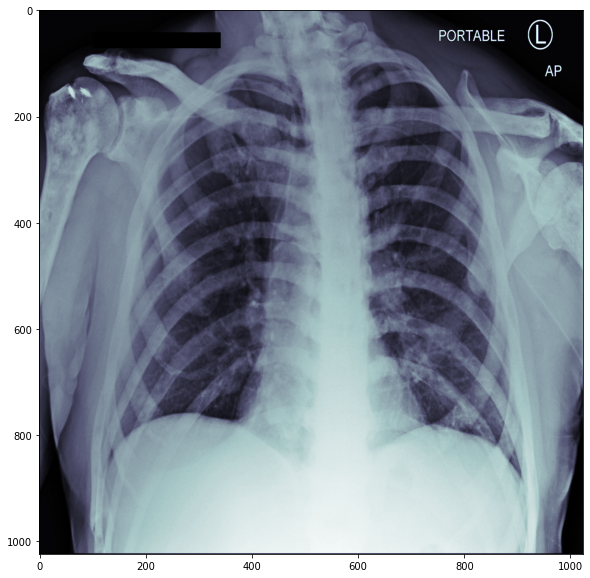

In [20]:
for file_path in discom_images_filenames:
  dataset = pydicom.dcmread(file_path)
  show_dcm_info(dataset)
  plot_pixel_array(dataset)
  break

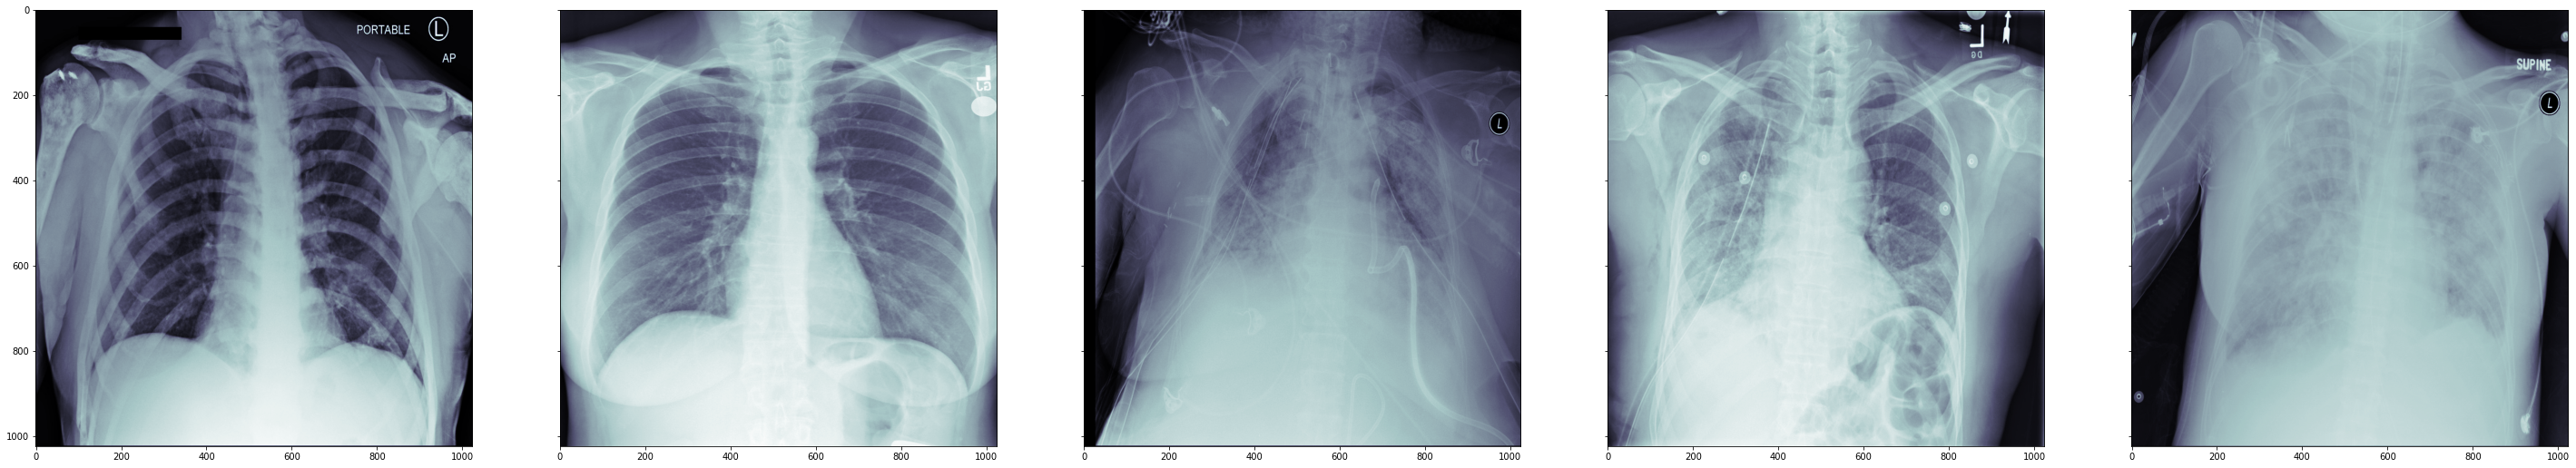

In [21]:
num_img = len(discom_images_filenames[:5])
fig, ax = plt.subplots(nrows=1, ncols=num_img, sharey=True, figsize=(num_img*10,10))
for q, file_path in enumerate(discom_images_filenames[:5]):
    dataset = pydicom.dcmread(file_path)
    #show_dcm_info(dataset)
    
    ax[q].imshow(dataset.pixel_array, cmap=plt.cm.bone)

In [0]:
mask_df = pd.read_csv('/pneumothorax/train-rle.csv')

In [23]:
mask_df.head()

,ImageId,EncodedPixels
0,1.2.276.0.7230010.3.1.4.8323329.5597.151787518...,-1
1,1.2.276.0.7230010.3.1.4.8323329.12515.15178752...,-1
2,1.2.276.0.7230010.3.1.4.8323329.4904.151787518...,175349 7 1013 12 1009 17 1005 19 1003 20 1002...
3,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,407576 2 1021 7 1015 10 1013 12 1011 14 1008 ...
4,1.2.276.0.7230010.3.1.4.8323329.32579.15178751...,252069 1 1021 3 1020 4 1018 5 1018 6 1016 7 1...


In [0]:
x = 0
for i in mask_df.iterrows():
  x += 1
  print(x)

In [0]:
def rle2mask(rle, width, height):
    mask= np.zeros(width* height)
    array = np.asarray([int(x) for x in rle.split()])
    starts = array[0::2]
    lengths = array[1::2]

    current_position = 0
    for index, start in enumerate(starts):
        current_position += start
        mask[current_position:current_position+lengths[index]] = 255
        current_position += lengths[index]

    return mask.reshape(width, height)

In [0]:
num_img = 5

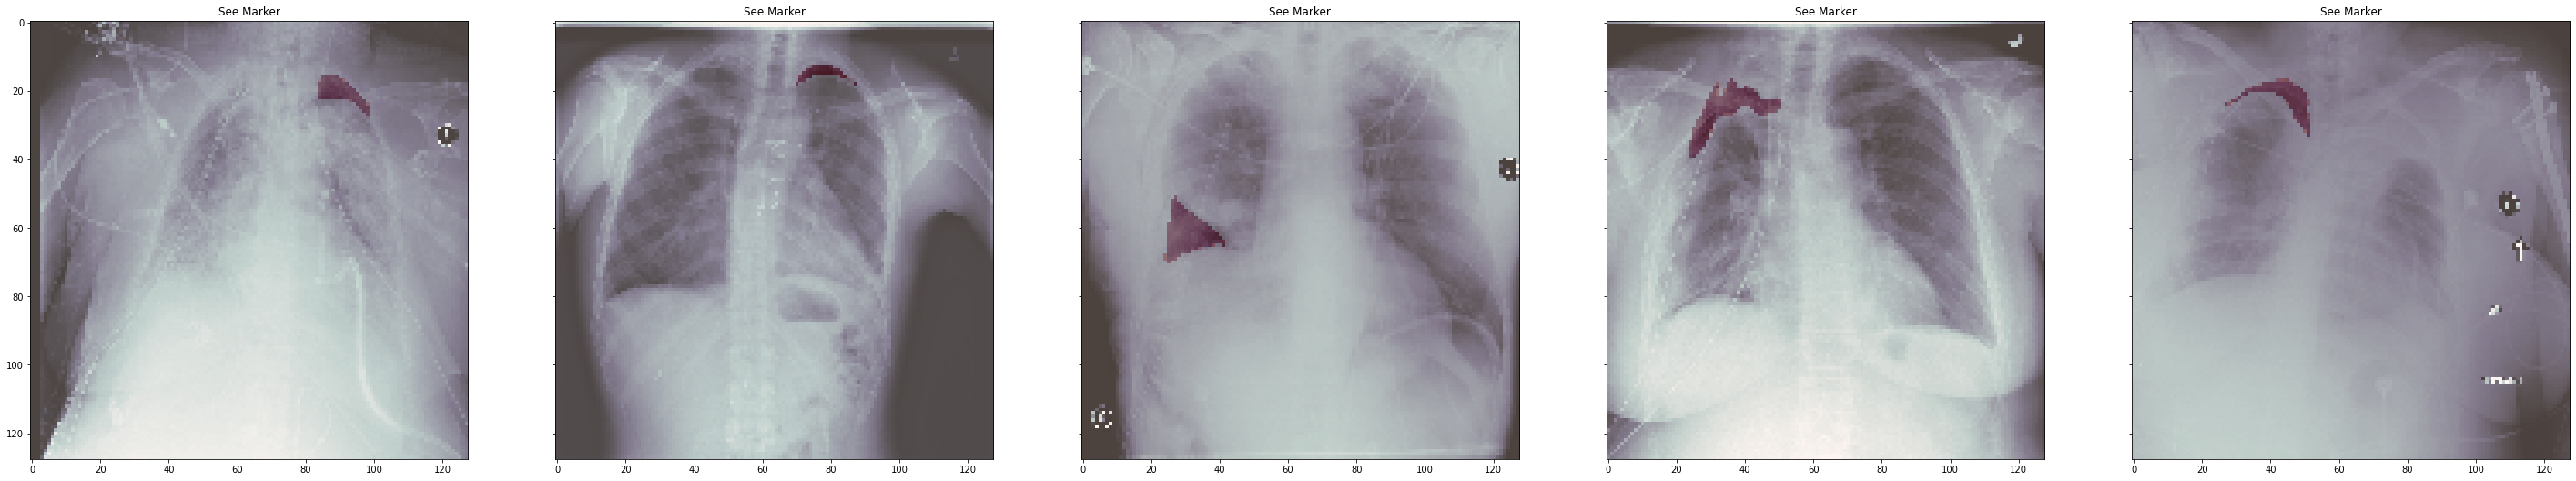

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=num_img, sharey=True, figsize=(num_img*10,10))
f = 0
for q, file_path in enumerate(discom_images_filenames):
    if f == 5:
      break
    dataset = pydicom.dcmread(file_path)
    #print(file_path.split('/')[-1][:-4])
    ft = cv2.resize(dataset.pixel_array, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
    ax[f].imshow(ft, cmap=plt.cm.bone)
   
    if  (mask_df[mask_df['ImageId'] == file_path.split('/')[-1][:-4]].iloc[0][' EncodedPixels']).strip() != '-1':
        mask = rle2mask((mask_df[mask_df['ImageId'] == file_path.split('/')[-1][:-4]].iloc[0][' EncodedPixels']).strip(), 1024, 1024).T
        mask = cv2.resize(mask, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
        ax[f].set_title('See Marker')
        ax[f].imshow(mask, alpha=0.3, cmap="Reds")
        f += 1
    else:
        ax[f].set_title('Nothing to see')

In [0]:
train_filepaths = obtain_filepaths(TRAIN_FOLDER)
test_filepaths = obtain_filepaths(TEST_FOLDER)

In [0]:
train_filepaths = sorted(train_filepaths)[:5000]
test_filepaths = sorted(test_filepaths)[:5000]

In [0]:
df_full = pd.read_csv('/pneumothorax/train-rle.csv', index_col='ImageId')

In [33]:
dataset = pydicom.read_file(train_filepaths[0])
dataset.pixel_array.shape

(1024, 1024)

In [0]:
import sys

In [0]:
np.resize(dataset.pixel_array, (128,128)).shape

(128, 128)

In [0]:
im_height = 1024
im_width = 1024
im_chan = 1
# Get train images and masks
X_train = np.zeros((len(train_filepaths), im_height, im_width, im_chan), dtype=np.uint8)
Y_train = np.zeros((len(train_filepaths), im_height, im_width, 1), dtype=np.bool)
print('Getting train images and masks ... ')
sys.stdout.flush()
for n, _id in tqdm_notebook(enumerate(train_filepaths), total=len(train_filepaths)):
    dataset = pydicom.read_file(_id)
    X_train[n] = np.expand_dims(dataset.pixel_array, axis=2)
    try:
        if '-1' in df_full.loc[_id.split('/')[-1][:-4],' EncodedPixels']:
            Y_train[n] = np.zeros((1024, 1024, 1))
        else:
            if type(df_full.loc[_id.split('/')[-1][:-4],' EncodedPixels']) == str:
                Y_train[n] = np.expand_dims(rle2mask(df_full.loc[_id.split('/')[-1][:-4],' EncodedPixels'], 1024, 1024), axis=2)
            else:
                Y_train[n] = np.zeros((1024, 1024, 1))
                for x in df_full.loc[_id.split('/')[-1][:-4],' EncodedPixels']:
                    Y_train[n] =  Y_train[n] + np.expand_dims(rle2mask(x, 1024, 1024), axis=2)
    except KeyError:
        print(f"Key {_id.split('/')[-1][:-4]} without mask, assuming healthy patient.")
        Y_train[n] = np.zeros((1024, 1024, 1)) # Assume missing masks are empty masks.

print('Done!')

Getting train images and masks ... 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


Key 1.2.276.0.7230010.3.1.4.8323329.10231.1517875222.737143 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.10362.1517875223.377845 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.10407.1517875223.567351 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.10599.1517875224.488727 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.1068.1517875166.144255 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.11104.1517875231.169401 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.11215.1517875231.757436 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.11557.1517875233.601090 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.11566.1517875233.640521 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.11577.1517875233.694347 without mask, assuming healthy patient.
K

In [35]:
im_height = 512
im_width = 512
im_chan = 1
X_train = np.zeros((len(train_filepaths), im_height, im_width, im_chan), dtype=np.uint8)
Y_train = np.zeros((len(train_filepaths), im_height, im_width, 1), dtype=np.bool)
print('Getting train images and masks ... ')
sys.stdout.flush()
for n, _id in tqdm_notebook(enumerate(train_filepaths), total=len(train_filepaths)):
    dataset = pydicom.read_file(_id)
    f = cv2.resize(dataset.pixel_array, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
    X_train[n] = np.expand_dims(f, axis=2)
    try:
        if '-1' in df_full.loc[_id.split('/')[-1][:-4],' EncodedPixels']:
            Y_train[n] = np.zeros((512, 512, 1))
        else:
            if type(df_full.loc[_id.split('/')[-1][:-4],' EncodedPixels']) == str:
              m = cv2.resize(rle2mask(df_full.loc[_id.split('/')[-1][:-4],' EncodedPixels'], 1024, 1024), dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
              Y_train[n] = np.expand_dims(m, axis=2)
            else:
                Y_train[n] = np.zeros((512, 512, 1))
                for x in df_full.loc[_id.split('/')[-1][:-4],' EncodedPixels']:
                  m = cv2.resize(rle2mask(x, 1024, 1024), dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
                  Y_train[n] =  Y_train[n] + np.expand_dims(m, axis=2)
    except KeyError:
        print(f"Key {_id.split('/')[-1][:-4]} without mask, assuming healthy patient.")
        Y_train[n] = np.zeros((512, 512, 1)) # Assume missing masks are empty masks.

print('Done!')

Getting train images and masks ... 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Key 1.2.276.0.7230010.3.1.4.8323329.10231.1517875222.737143 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.10362.1517875223.377845 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.10407.1517875223.567351 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.10599.1517875224.488727 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.1068.1517875166.144255 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.11104.1517875231.169401 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.11215.1517875231.757436 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.11557.1517875233.601090 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.11566.1517875233.640521 without mask, assuming healthy patient.
Key 1.2.276.0.7230010.3.1.4.8323329.11577.1517875233.694347 without mask, assuming healthy patient.
K

In [36]:
X_train.shape

(5000, 512, 512, 1)

In [37]:
Y_train.shape

(5000, 512, 512, 1)

In [0]:
X_train = 0
Y_train = 0

In [0]:
im_height = 128
im_width = 128
X_train = X_train.reshape((-1, im_height, im_width, 1))
Y_train = Y_train.reshape((-1, im_height, im_width, 1))

In [38]:
from keras import backend as K

Using TensorFlow backend.


In [0]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [40]:
inputs = tf.keras.Input((None, None, im_chan))

c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same') (inputs)
c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2)) (c1)

c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2)) (c2)

c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2)) (c3)

c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same') (p4)
c5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same') (c5)
p5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2)) (c5)

c55 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same') (p5)
c55 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same') (c55)

u6 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c55)
u6 = tf.keras.layers.concatenate([u6, c5])
c6 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u71 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u71 = tf.keras.layers.concatenate([u71, c4])
c71 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same') (u71)
c61 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same') (c71)

u7 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c61)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = tf.keras.layers.Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 8 80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 8 584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, None, None, 8 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [41]:
X_train.shape

(5000, 512, 512, 1)

In [42]:
model.fit(X_train, Y_train, validation_split=.2, batch_size=64, epochs=30)

Epoch 1/30
63/63 [==============================] - 154s 2s/step - loss: 0.1634 - dice_coef: 0.0024 - val_loss: 0.0338 - val_dice_coef: 0.0035
Epoch 2/30
63/63 [==============================] - 145s 2s/step - loss: 0.0259 - dice_coef: 0.0046 - val_loss: 0.0257 - val_dice_coef: 0.0032
Epoch 3/30
63/63 [==============================] - 145s 2s/step - loss: 0.0228 - dice_coef: 0.0065 - val_loss: 0.0233 - val_dice_coef: 0.0087
Epoch 4/30
63/63 [==============================] - 145s 2s/step - loss: 0.0216 - dice_coef: 0.0085 - val_loss: 0.0225 - val_dice_coef: 0.0095
Epoch 5/30
63/63 [==============================] - 145s 2s/step - loss: 0.0214 - dice_coef: 0.0092 - val_loss: 0.0231 - val_dice_coef: 0.0106
Epoch 6/30
63/63 [==============================] - 145s 2s/step - loss: 0.0210 - dice_coef: 0.0098 - val_loss: 0.0218 - val_dice_coef: 0.0102
Epoch 7/30
63/63 [==============================] - 145s 2s/step - loss: 0.0208 - dice_coef: 0.0110 - val_loss: 0.0225 - val_dice_coef: 0.0114

In [0]:
X_train.shape

(320000, 128, 128, 1)

In [0]:
dataset = pydicom.read_file(test_filepaths[87])


In [98]:
f = dataset.pixel_array.copy()
f.shape

(1024, 1024)

In [0]:
f = cv2.resize(f, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)

In [0]:
f = np.expand_dims(f, axis=2)
f = np.expand_dims(f, axis=0)

In [101]:
f.shape

(1, 512, 512, 1)

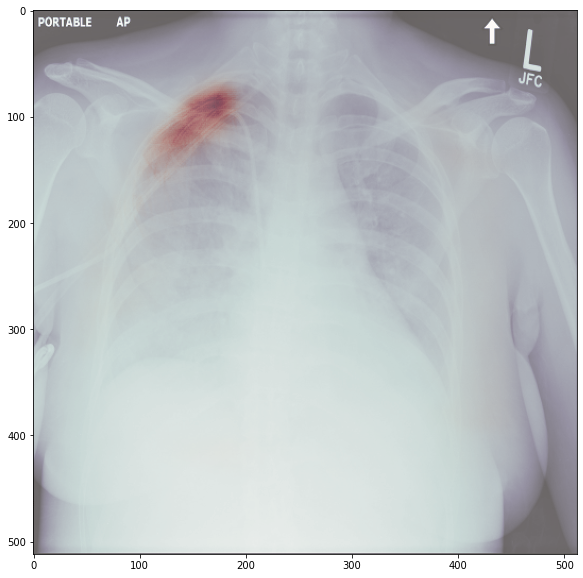

In [104]:
plt.figure(figsize=(10,10))
plt.imshow(tf.squeeze(f), cmap=plt.cm.bone)
plt.imshow(tf.squeeze(res.T), alpha=0.4, cmap='Reds')

In [0]:
res = model.predict(f)

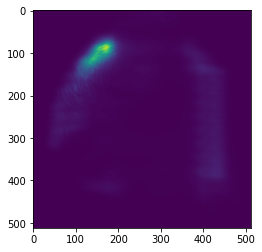

In [103]:
plt.imshow(tf.squeeze(res.T))

In [0]:
model.save_weights('segmentation.h5py')
model.save_weights('segmentation.ckpt')

In [0]:
!mkdir checkpoint

In [0]:
model.save_weights('checkpoint/segmentation.ckpt')

In [0]:
n_model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

In [112]:
n_model.load_weights('checkpoint/segmentation.ckpt')

In [0]:
n_res = n_model.predict(f)

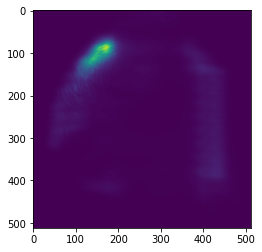

In [114]:
plt.imshow(tf.squeeze(n_res.T))

In [115]:
!zip -r /content/seg_checkpoint.zip /content/checkpoint

  adding: content/checkpoint/ (stored 0%)
  adding: content/checkpoint/segmentation.ckpt.data-00001-of-00002 (deflated 6%)
  adding: content/checkpoint/segmentation.ckpt.data-00000-of-00002 (deflated 88%)
  adding: content/checkpoint/checkpoint (deflated 41%)
  adding: content/checkpoint/segmentation.ckpt.index (deflated 78%)
